# Ronen Reouveni
# NLP Homework 2: The Odyssey



---


# Introduction

The Odyssey is a famous Greek text written by Homer. It is an epic adventure and it sees its main characters travel across the world. Interestingly, it is 
one of the oldest texts written, dating back to the 8th century BCE. This analysis will focus on tagging the texts with its appropriate parts of speech. Doing this will hopefully illuminate some interesting trends and ideas from the epic. Furthermore, it will highlight the foundations of sentiment analysis and lay a groundwork for possible further exploration of the text. 

# Explanation of Cleaning 

Since this is a text from the internet and it is not pre-cleaned there are some steps needed to edit the document. However, this is actually very straightforward. When importing the texts new lines were broken up with the '\n' symbol. .replace is used to replace every instance of this with a blank space. The text is also all set to lower case. However, lowercasing introduces some issues. By lower casing, our program is now unable to pick up on some proper nouns. This is explained more in the sections which directly deal with nouns. On the other hand, lower casing is done because when searching for a word with a parts of speech tag, we do not want capitalized words and lower case words considered as different. Finally, because much of the analysis will revolve around sentence length, commas are also all removed. This is so when the text is tokenized we can more accurately assess each sentence without any commas. 

---


Once the text is in this form it is ready to actually preprocess and get it in the form needed for analysis. First, we tokenize the text into sentences. Once the text is split by sentences, it is then split by words within the sentences. Finally, tags are added to each word using pos_tag. At this point, the data structure is a list of lists, where the inner list contains tuples. These tuples are the word in that location and the tag of that word. This final form of the data is then used for all subsequent analysis. The only other data form used is the raw text itself to be passed into TextBlob's sentiment analysis. 



# Explanation of Analysis


The working hypothesis is that this analysis will show that the text has very high highs and very low lows. From domain knowledge, it is known that the Odyssey is extremely epic. It has great adventure and exploration, but it is also sad and contains a deep longing for home and returning to normality. It has themes of adventure, as noted above, but it also seems to come at the cost of watching children grow up and never seeing one's family or home again. 

To begin the analysis, basic corpus statistics are calculated. This includes calculating the number of sentences in the entire corpus, and the average length of each sentence. I also calculate the average number of words per sentence, the total number of words in the entire corpus, and the number of unique words in the corpus. 

From here, the function findPhrases does most of the work. It is based on the code provided by the instructor with some changes. The function takes as an argument the input text, and a phrase we want to search for. Then, the function is able to find the most common parts of speech tags. For example, we can pass adjective+noun into the function and it will find all instances of adjective+noun and then create a frequency distribution from it. It is essentially able to find phrases. Conveniently, the function is also built to store all the data into a data frame, this makes visualizing very easy. The function also calculates the average length of the given phrase structure. The function saves all of this in an object that can be easily accessed. 

Subsequently, I built an additional two functions. The first, DrawPlot, is able to create a lollipop plot of the data in the data frame created in the function described above. The second function is printFreq, this simply prints the output of the function in a digestible way. Finally, before actually calling these functions on the decided phrases, I calculate the distribution of all the tags in the data set. 

Each phrase that is considered encompasses all versions of the parts of speech. For example, calling the function on JJ will not just catch the adjectives, but also JJR and JJS. This is also the same for other tags, RB, NN, VB etc. The phrases considered in analysis are as followed:


1.   Adjective phrases: Adverb+Adjective
2.   Adverb phrases: Adverb+Adverb

We also consider interesting patterns, these are: 

1.  Adjective+Noun
2.  Verb+Nouns
3.  Adjective + Conjunction + Adjective
4.  Adjective + Adjective 


For each of the mentioned, we find the distributions, visualize them with a lollipop graph, and find average length of the phrases. After this, I then call a function called TopWords. This simply finds the top tokens for each adjective, adverb, noun, and verb. 


Finally, I wanted to create a sort of arc to the story. The way that I do this is divide the characters of the raw text into 1,000 sections. This gives us 1,000 blocks of 602 characters, which is just under 4 sentences. I then calculate the polarity, or sentiment score for each one of these batches. This gives a very noisy result, which is to be expected. However, what I can do then is calculate a moving average with a window of 30. This means, we will take the average sentiment of roughly every 114 sentences. By plotting this moving average we will get an insight into the arc of the story. How does the mood and sentiment of the text change over time? It would make sense for us to see swings in sentiment, as the story gets happier and sadder. It would not make sense for the sentiment to be consistent over the entire text. 


# Code and Output

In [ ]:
# importing required nltk libraries
import nltk
from nltk import sent_tokenize
import re
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
#importing libs
from nltk.tokenize import RegexpTokenizer
from nltk.collocations import *


In [ ]:
#open file and do some prelimenary cleaning 
greekEpic = open('odyssey.txt')
o_raw = greekEpic.read()
o_raw = o_raw.replace('\n',' ') #remove \n 
o_raw = o_raw.replace(',','') #remove commas
o_raw = o_raw.lower() #lowercase the entire text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='odyssey.txt' mode='r' encoding='UTF-8'>
  


In [ ]:
from textblob import TextBlob

testimonial = TextBlob(o_raw)
print('o_raw',testimonial.sentiment)

o_raw Sentiment(polarity=0.13876232117825624, subjectivity=0.5060452695092224)


In [ ]:
#split text and tag
textsplit = nltk.sent_tokenize(o_raw) #split by sentences 
tokentext = [nltk.word_tokenize(sent) for sent in textsplit] #tokenize words within sentences
taggedtext = [nltk.pos_tag(tokens) for tokens in tokentext] #apply POS tags to each token generated in the previous line
print(tokentext[0]) #print the first tokenized sentence
print(taggedtext[0]) #print the tagged version

['tell', 'me', 'o', 'muse', 'of', 'that', 'ingenious', 'hero', 'who', 'travelled', 'far', 'and', 'wide', 'after', 'he', 'had', 'sacked', 'the', 'famous', 'town', 'of', 'troy', '.']
[('tell', 'VB'), ('me', 'PRP'), ('o', 'JJ'), ('muse', 'NN'), ('of', 'IN'), ('that', 'DT'), ('ingenious', 'JJ'), ('hero', 'NN'), ('who', 'WP'), ('travelled', 'VBD'), ('far', 'RB'), ('and', 'CC'), ('wide', 'JJ'), ('after', 'IN'), ('he', 'PRP'), ('had', 'VBD'), ('sacked', 'VBN'), ('the', 'DT'), ('famous', 'JJ'), ('town', 'NN'), ('of', 'IN'), ('troy', 'NN'), ('.', '.')]


# Basic Statistics

In [ ]:
# number of sentences
print(len(textsplit))
# Calculating the average length of sentences in the entire corpus
sum(len(sent) for sent in textsplit) / len(textsplit)

3803


156.82145674467526

In [ ]:
#average words per sentence 
#note: calculated based on number of tokens
totalWords = 0 
for sent in tokentext:
  totalWords = totalWords + len(sent)
print(totalWords/len(textsplit))

32.996055745464105


In [ ]:
#number of words in the corpus 
#unpack list of lists into one list
flat_list = [] #make empty list 
for sublist in tokentext:  
    for item in sublist:
        flat_list.append(item)
print('Number of words in the text:',len(flat_list)) #the length of this list is the number of tokens 
print('Unique words in text:', len(set(flat_list))) #the set function gives us # of unique tokens

Number of words in the text: 125484
Unique words in text: 6796


In [ ]:
#distribution of tags
flatten_ = [pair for sent in taggedtext for pair in sent] #reduce list of lists into single list 
distro = nltk.FreqDist(tag for (word, tag) in flatten_) #calculate freqDist
for tag,freq in distro.most_common(): #print freqDist
  print (tag, freq)

NN 17478
IN 15213
DT 10632
PRP 10396
VBD 7355
RB 7080
CC 6498
VB 6406
JJ 6275
NNS 5929
PRP$ 3961
. 3807
TO 3176
VBP 2765
VBN 2648
MD 2450
VBG 2088
: 1975
VBZ 1743
`` 1021
WRB 1009
'' 950
WP 943
CD 714
RP 708
WDT 587
POS 383
EX 285
PDT 265
JJR 242
JJS 182
RBR 137
RBS 65
WP$ 38
FW 21
NNP 19
( 19
) 19
NNPS 2


# Function Definitions

In [ ]:
#returns freq dist, dataframe, and average length of phrase
#function to find phrases, and compute statistics on the phrases
def findPhrases(inpuText, phrase):
  #define grammer for regex
  grammar = phrase
  chunk_parser = nltk.RegexpParser(grammar)

  #build parse trees
  myTags = []
  for sent in inpuText:
      if len(sent) > 0:
        tree = chunk_parser.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'test':
                myTags.append(subtree)
                
# append data to list 
  myPhrase = []
  for sent in myTags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    myPhrase.append(temp)

  mySent = []
  for sents in myTags:
    temp=''
    for (word,tag) in sents:
        temp += word+' '
        mySent.append(temp)
        
#calculate average length of phrases
  totalSent = sum(len(sent) for sent in mySent) 
  avgLeng = (totalSent / len(mySent))

#calculate frequency distro
  freq_ = nltk.FreqDist(myPhrase)
  distro = freq_.most_common(50)

#turn data into pandas frame
  df = pd.DataFrame(distro, columns =['Phrase', 'Freq'])
  df.sort_values('Freq', inplace=True)          

#return an object with the info needed for analysis
  return(distro,df,avgLeng)


In [ ]:
# Draw plot
def DrawPlot(df, title):
  fig, ax = plt.subplots(figsize=(20,10), dpi= 80) #define plot size
  ax.vlines(x=df.index, ymin=0, ymax=df.Freq, color='darkviolet', alpha=0.7, linewidth=2) #define asthetics
  ax.scatter(x=df.index, y=df.Freq, s=75, color='black', alpha=0.7) #define asthetics

# Title, Label, Ticks and Ylim
  ax.set_title(title, fontdict={'size':22})
  ax.set_ylabel('Frequency')
  ax.set_xticks(df.index)
  ax.set_xticklabels(df.Phrase.str.upper(), rotation=75, fontdict={'horizontalalignment': 'center', 'size':12})
  ax.set_ylim(0, max(df['Freq'])+2)

# Labels
  for row in df.itertuples():
    ax.text(row.Index, row.Freq+.7, s=round(row.Freq, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

  plt.show()

In [ ]:
#function to loop through object output from findPhrases and print results 
def printFreq(obj, title):
  print(title)
  for word, freq in obj:
    print(word, freq)

# Top Phrases

adjective phrases
so much  25
as much  14
so many  14
very angry  13
not right  8
still alive  7
so i  7
once more  6
much better  5
much more  5
more likely  4
then antinous  4
very much  4
not so much  4
already dead  4
still further  4
just such  4
then alcinous  4
very great  4
too much  4
so angry  3
very little  3
too old  3
quite young  3
very sorry  3
indeed dead  3
very rich  3
so hard  3
quite different  3
very serious  3
so great  3
still young  3
too quick  3
even so i  3
still furious  2
not dead  2
away much  2
very good  2
as good  2
so long  2
therefore i  2
none other  2
quite dead  2
so close  2
still such  2
quite clear  2
very strong  2
most precious  2
very last  2
perfectly able  2


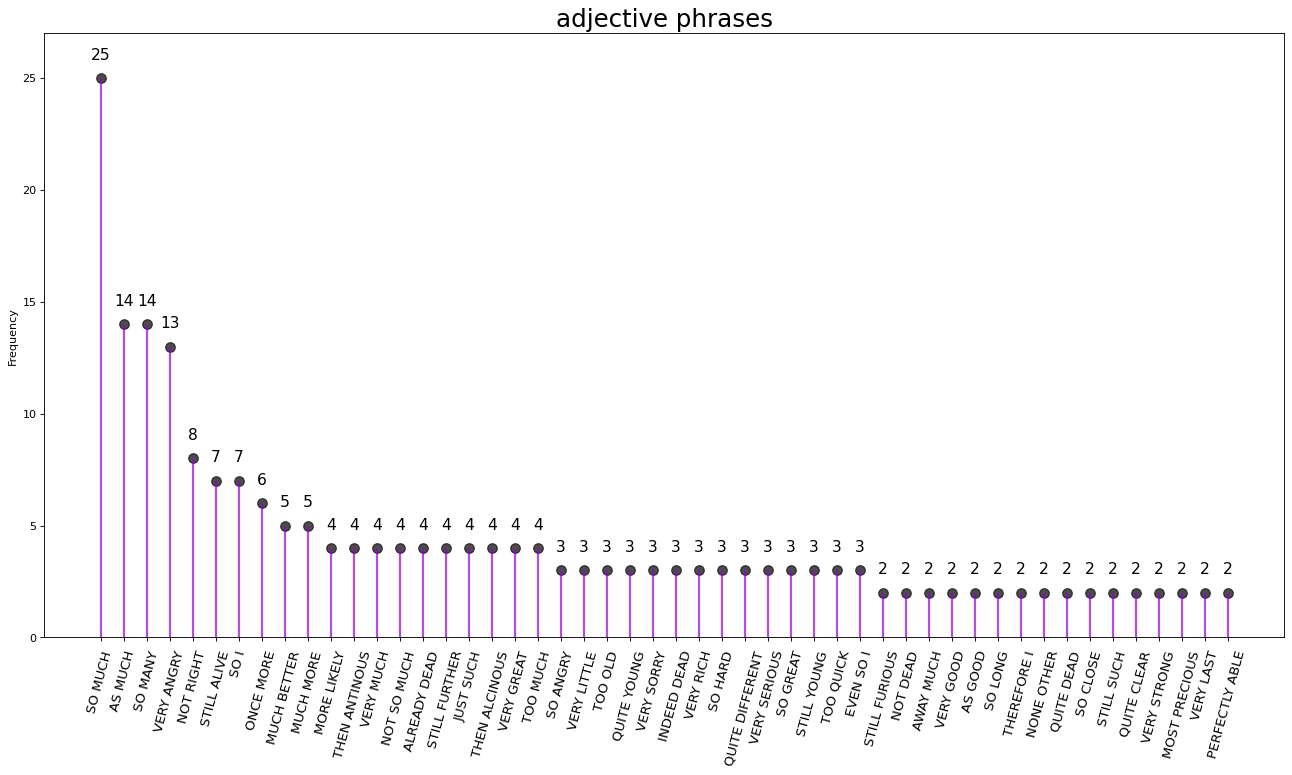

Average length: 8.82284231018819


In [ ]:
#call functions on RB + JJ
adjPhrases = findPhrases(taggedtext,"test: {<RB.?>+<JJ.?>}") #"adjective phrases" 
printFreq(adjPhrases[0], "adjective phrases")
DrawPlot(adjPhrases[1],"adjective phrases" )
print('Average length:', adjPhrases[2])

adverb phrases
as soon  59
so long  23
not even  22
even so  21
now however  18
as long  15
so much  14
never yet  14
not yet  13
as well  11
as fast  11
thus then  9
ever yet  8
so also  8
now therefore  8
back again  8
not alone  7
then telemachus  7
so far  6
no longer  6
very well  6
not so  6
as far  5
down again  5
home again  5
not only  4
back here  4
away again  4
here then  4
as much  4
so now  3
far away  3
ere long  3
again immediately  3
straight up  3
quite still  3
here too  3
not possibly  3
not far  3
not there  3
so far away  3
not therefore  3
even now  3
master here  2
as lovely  2
safely back  2
so heavily  2
very utmost  2
up too  2
then again directly  2


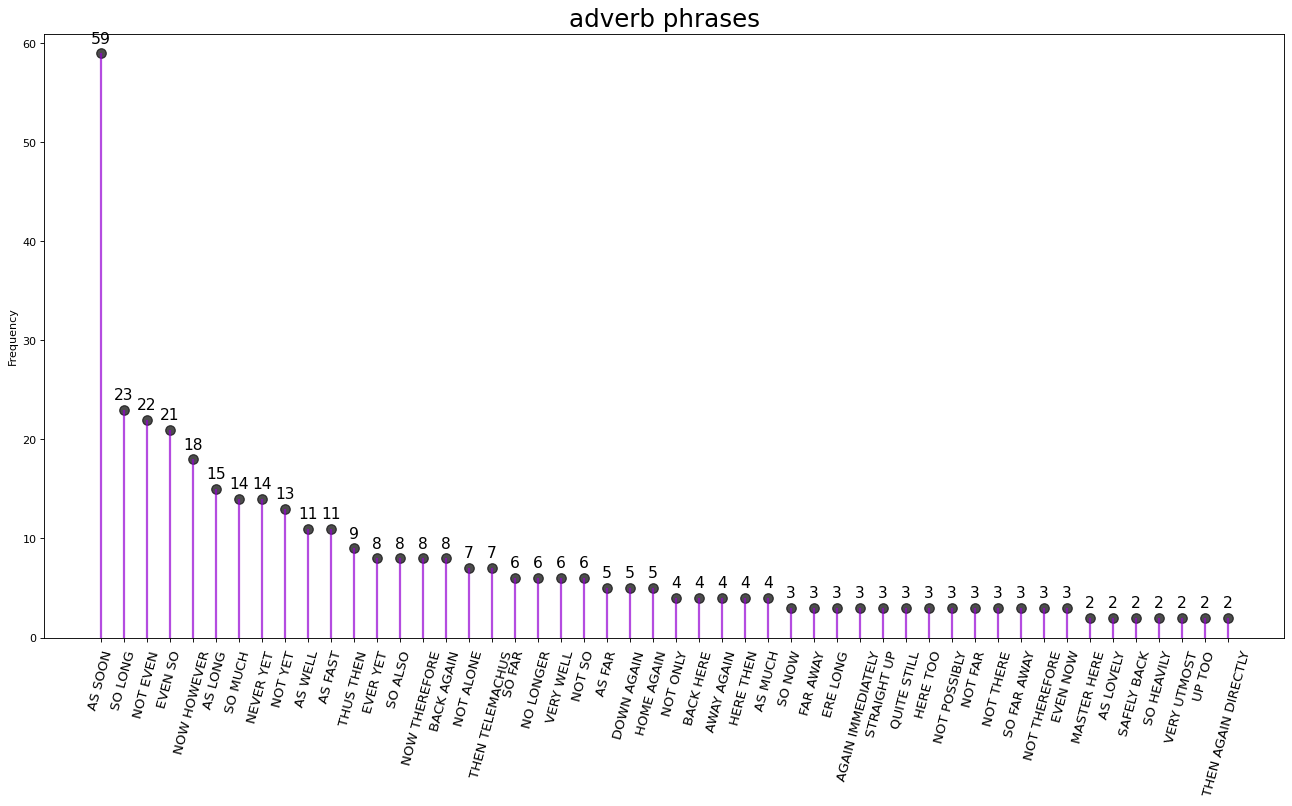

Average length: 7.861416361416361


In [ ]:
#call functions on RB + RB
adverbPhrases = findPhrases(taggedtext,"test: {<RB>+<RB>}") #"adverb phrases"
printFreq(adverbPhrases[0], "adverb phrases")
DrawPlot(adverbPhrases[1],"adverb phrases" )
print('Average length:', adverbPhrases[2])

adjectives+nouns
own house  33
own country  26
old man  25
rosy-fingered dawn  19
other people  17
good things  16
outer court  15
fair wind  13
young men  13
whole world  13
immortal gods  12
long way  12
other gods  11
long time  11
noble son  11
other hand  10
wicked suitors  10
thigh bones  10
same time  10
old woman  9
much hardship  9
own room  9
great deal  9
dear husband  8
old friend  8
foreign country  8
bad end  8
own people  7
right hand  7
upper servant  7
due course  7
dear child  7
own ship  7
own home  7
livelong day  7
other side  7
poor man  6
beautiful golden ewer  6
only man  6
own abode  6
chief men  6
aegis-bearing jove  6
poor fellow  6
wicked people  6
best man  6
high mountain  6
queen penelope  6
ogygian island  5
clean table  5
many good things  5


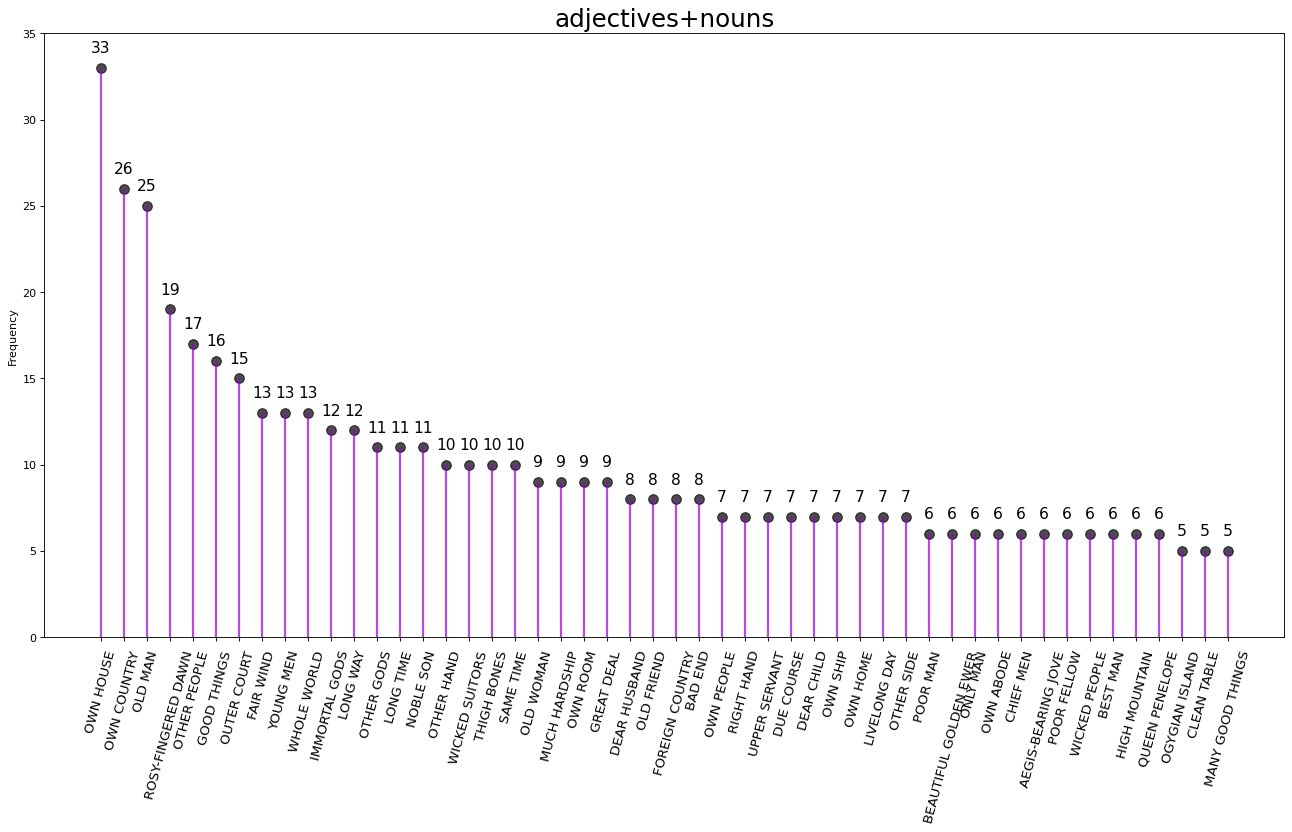

Average length: 10.062664907651715


In [ ]:
#call functions on JJ + NN
adjNouns = findPhrases(taggedtext,"test: {<JJ.?>+<NN.?>}") #adjectives+nouns
printFreq(adjNouns[0], "adjectives+nouns")
DrawPlot(adjNouns[1],"adjectives+nouns" )
print('Average length:', adjNouns[2])

verbs+nouns
get home  20
said i  15
go home  12
getting home  11
come home  9
did ulysses  9
is nothing  8
blessed gods  8
return home  7
set sail  7
have nothing  7
tell penelope  7
make trial  7
went home  6
have something  6
answered ulysses  6
get news  5
twelve days  5
make haste  5
was son  5
replied ulysses  5
caught hold  5
was nothing  5
said 'ulysses  5
answered euryclea  5
hear anything  4
caught sight  4
poured water  4
went round  4
take offence  4
keep guard  4
took telemachus  4
drink telemachus  4
have escaped death  4
take heart  4
said penelope  4
has seen fit  4
made ulysses  4
laid hold  4
was daughter  4
is time  4
wish i  4
decorated seat  3
bring matters  3
are making havoc  3
escape death  3
say nothing  3
is something  3
make drink-offerings  3
set eyes  3


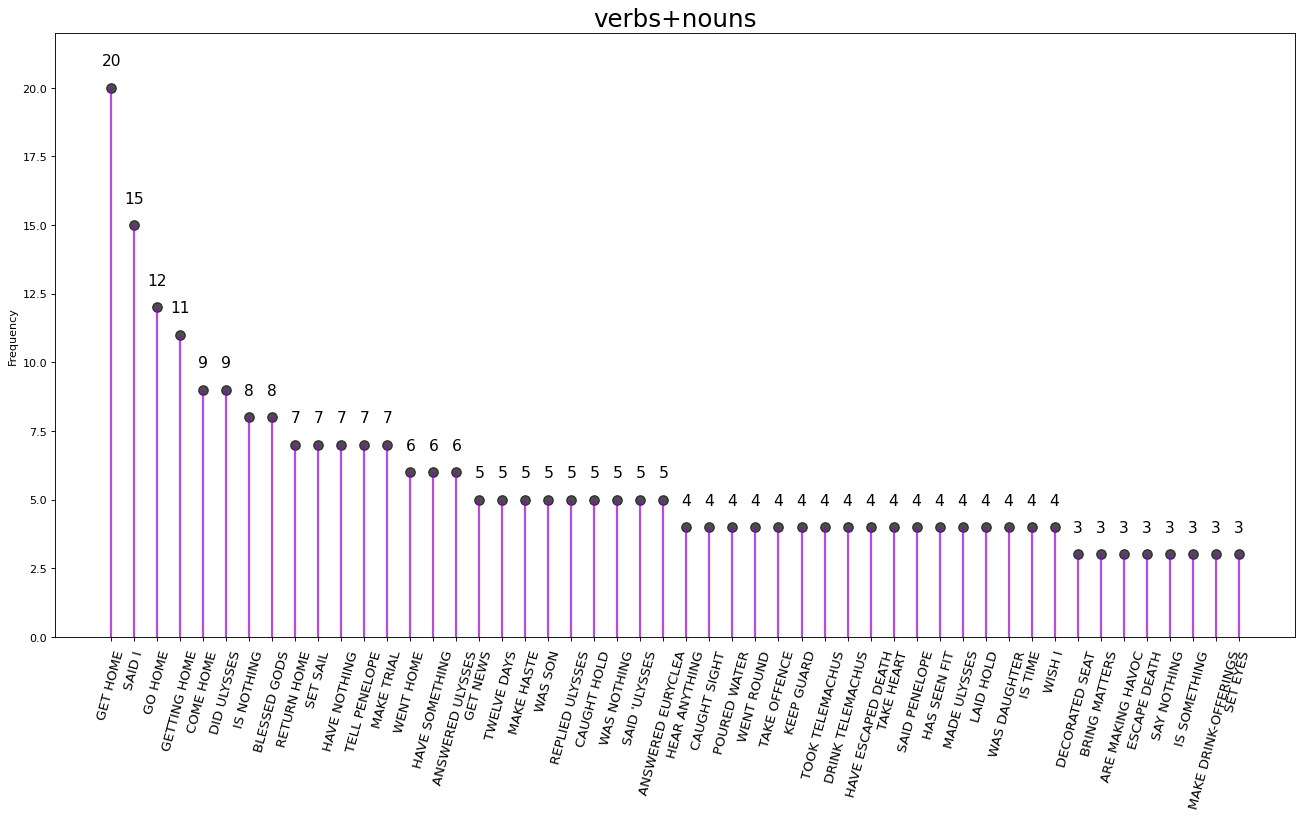

Average length: 9.620348139255702


In [ ]:
#call functions on VB + NN
verbNouns = findPhrases(taggedtext,"test: {<VB.?>+<NN.?>}") #verbs+nouns
printFreq(verbNouns[0], "verbs+nouns")
DrawPlot(verbNouns[1],"verbs+nouns" )
print('Average length:', verbNouns[2])

adj+conj+adj
alive or dead  5
old and young  4
good and evil  3
full and sufficient  3
rich nor poor  3
old or young  2
antinous and eurymachus  2
unwaked and unburied  2
great and powerful  2
young and strong  2
impatient if i  1
such as only  1
hither and thither  1
cruel and unjust  1
fool or coward  1
old and new  1
unblended and fit  1
heavy and full  1
least shy or nervous  1
wise or understanding  1
full either single-handed  1
menelaus and i  1
vast and terrible  1
poor and short  1
best and fleetest  1
white and polished  1
fair as golden  1
side full of fine  1
close and happy  1
rare and excellent  1
unhappy about wrong  1
public or private  1
good and bad  1
long and dangerous  1
strong and fish-like  1
tighter and tighter  1
white and spreading  1
dead or alive  1
couch beside tithonus-  1
tall or well-looking  1
fine and graceful  1
full of black  1
sea-gull and vanished  1
rocky and surf-beaten  1
uncivilized or hospitable  1
begrimed with salt  1
mortal and live  1
vulc

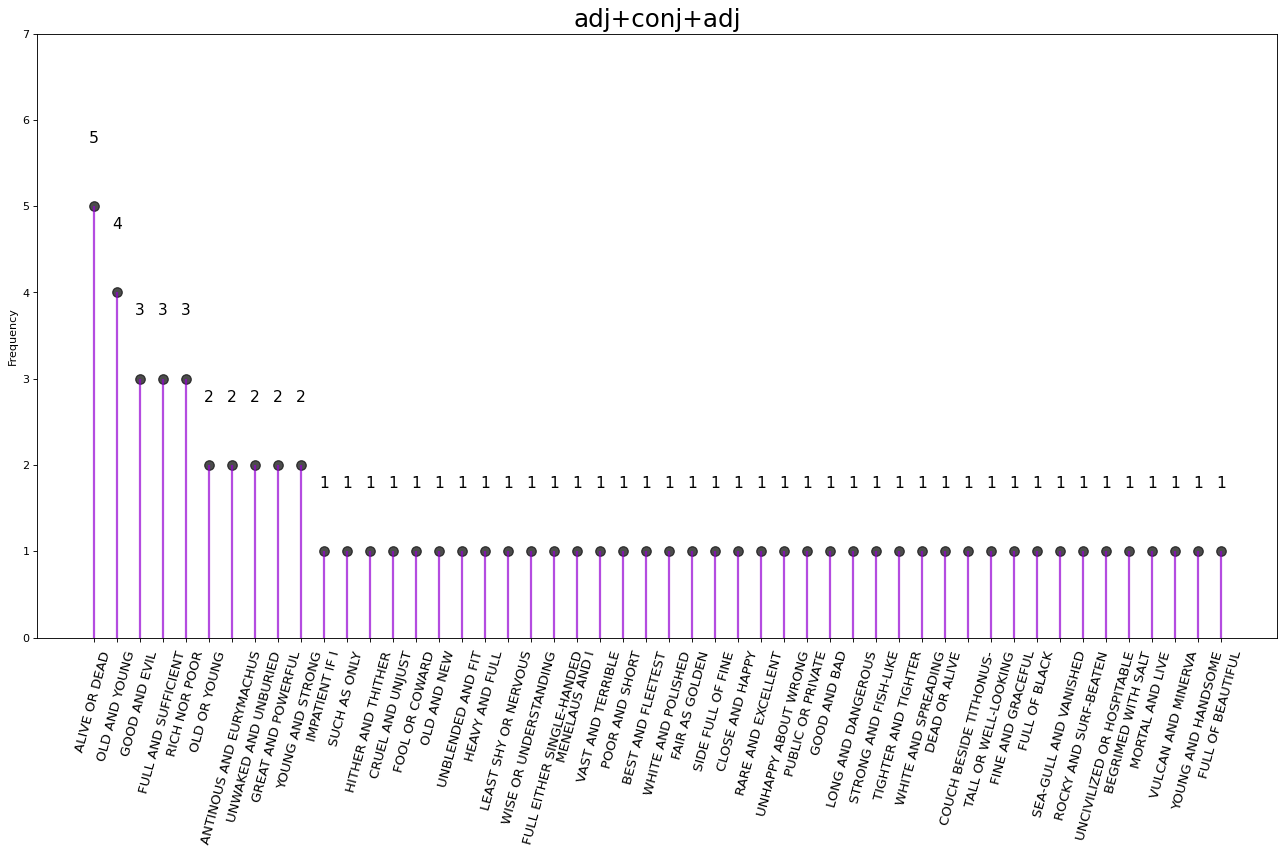

Average length: 11.852112676056338


In [ ]:
#call functions on JJ + CC|IN + JJ
grpsOfAdjs = findPhrases(taggedtext,"test: {<JJ.?>+<CC|IN>+<JJ.?>}") #groups of adjectives
printFreq(grpsOfAdjs[0], "adj+conj+adj")
DrawPlot(grpsOfAdjs[1],"adj+conj+adj" )
print('Average length:', grpsOfAdjs[2])

adj+adj
beautiful golden  7
many good  6
poor unhappy  3
needlework perish unrecorded-  3
great web  3
such good  3
own free  3
best young  3
own young  3
redoubtable bronze-shod  2
much longer  2
dulichium same  2
own good  2
good old  2
such divine  2
such rare  2
such great  2
twisted ox  2
dear young  2
good natural  2
such dangerous  2
valiant warrior  2
green old  2
good red  2
early to-morrow  2
i wish  2
dear old  2
great many  2
quiver full  2
dead first  2
poor feckless  2
i say-  2
other great  2
own old  2
fast asleep  2
quite clean  2
such disgraceful  2
miserable old  2
dinner ready  2
lonely sea-girt  1
many other  1
fine smart  1
little longer  1
only dear  1
god willing  1
many great  1
own wedded  1
heaven lest  1
other trick  1
tyro alcmena  1


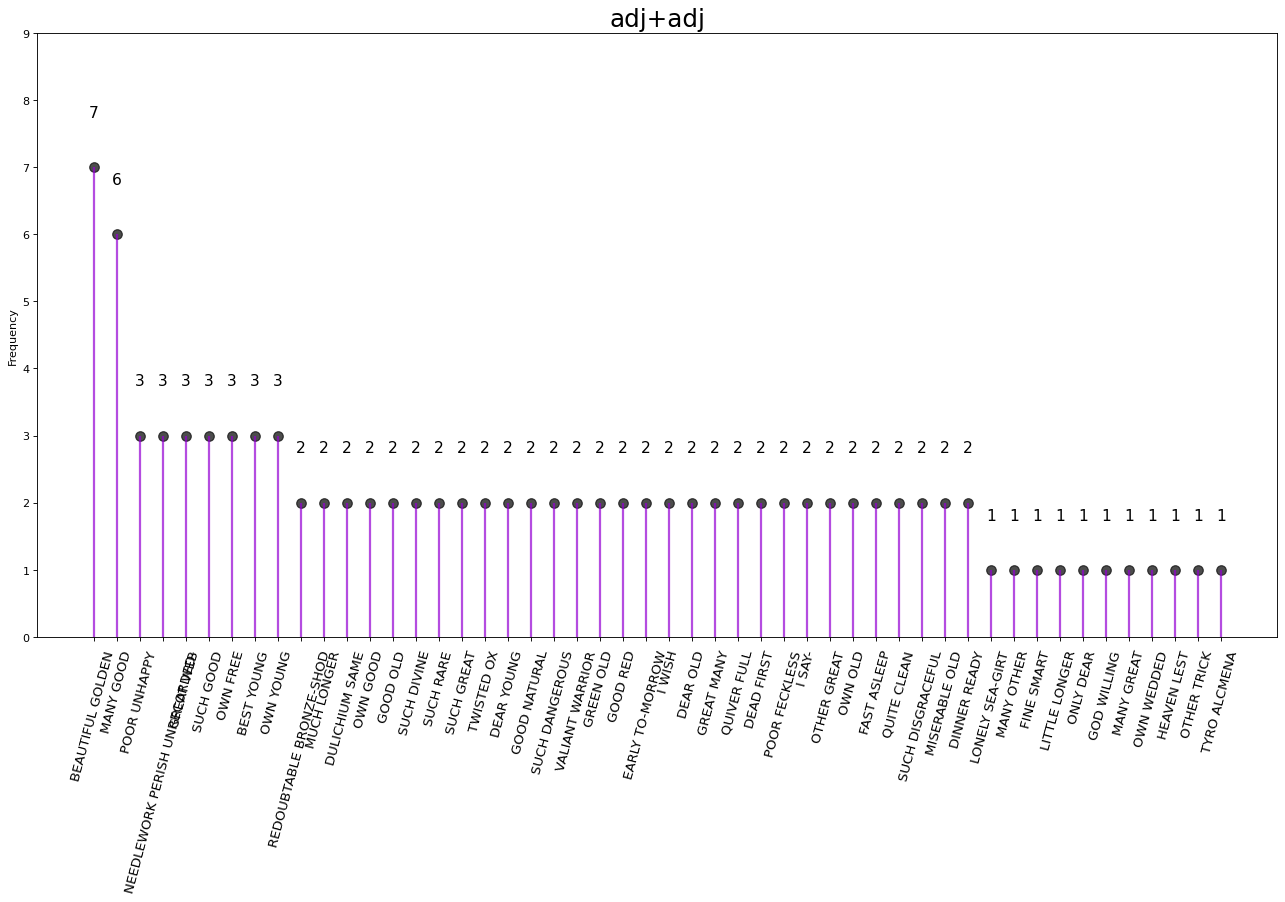

Average length: 9.715568862275449


In [ ]:
#call functions on JJ + JJ
adjAdj = findPhrases(taggedtext,"test: {<JJ.?>+<JJ.?>}") #more general than JJ + JJ + NN
printFreq(adjAdj[0], "adj+adj")
DrawPlot(adjAdj[1],"adj+adj" )
print('Average length:', adjAdj[2])

# Top Words

In [ ]:
#takes a list of tags, finds most common words of those tags
def topWords(tags, text):
  myToken = []
  for sentence in text:
    for word, pos in sentence:
        if pos in tags: 
            if len(word)>1:
                myToken.append(word)
  freq_ = nltk.FreqDist(myToken)

  for word, freq in freq_.most_common(50):
    print(word,freq) 


In [ ]:
topWords(['JJ', 'JJR', 'JJS'], taggedtext) #adjective, comparative, superlative

own 271
good 192
other 182
great 179
old 148
many 127
much 121
such 116
young 78
dead 74
best 72
whole 70
full 68
more 66
long 61
alcinous 61
poor 59
first 58
antinous 54
better 49
fair 45
right 43
same 43
last 43
dear 40
fine 40
angry 38
alive 37
bad 37
strong 36
high 35
true 32
able 32
little 31
noble 31
excellent 31
golden 29
immortal 28
large 27
sure 27
beautiful 26
clean 26
hard 26
ready 26
present 25
wicked 25
open 21
due 21
only 20
rosy-fingered 20


In [ ]:
topWords(['RB', 'RBR', 'RBS'], taggedtext) # adverb, comparative, superlative

not 761
then 555
so 524
now 275
here 218
as 166
back 161
still 161
again 158
very 150
even 137
also 137
away 127
thus 127
never 121
once 120
soon 99
there 98
yet 97
too 90
down 90
however 87
well 86
more 83
long 82
up 81
much 78
far 76
ever 76
therefore 73
only 73
telemachus 72
just 66
most 62
always 51
together 48
else 48
indeed 48
first 46
enough 46
presently 45
quite 37
alone 36
already 34
meanwhile 31
fast 30
close 28
longer 25
surely 23
heaven 22


In [ ]:
topWords(['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'], taggedtext) # all verbs, but this list is very boring 

was 947
had 839
is 780
have 768
are 555
said 478
were 472
be 470
do 374
has 303
went 301
go 268
did 263
come 260
tell 255
been 255
came 209
see 207
made 198
am 198
let 196
take 193
took 186
got 173
make 167
answered 148
set 146
get 144
know 129
give 124
put 122
saw 122
left 117
brought 107
told 105
say 104
gave 101
ulysses 98
going 97
began 84
find 83
heard 81
spoke 79
saying 79
killed 78
done 76
gone 75
sent 75
fell 69
having 68


In [ ]:
topWords(['NN','NNS', 'NNP', 'NNPS'], taggedtext) #all nouns

ulysses 455
house 391
man 331
men 316
son 264
suitors 231
ship 225
home 212
father 207
people 178
gods 172
sea 171
way 171
hands 141
day 127
jove 126
telemachus 121
time 117
minerva 108
water 107
country 105
wine 105
heaven 94
mother 94
hand 94
wife 89
end 88
penelope 88
stranger 88
head 86
nothing 85
others 85
place 84
town 83
land 82
daughter 81
side 81
women 78
god 77
room 76
night 75
heart 74
wind 73
city 72
ground 71
matter 70
till 70
things 69
ships 69
death 67


# Arc of Sentiment with Moving Average

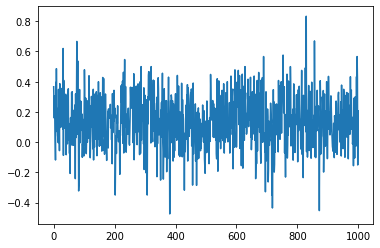

In [ ]:
# arc of sentiment 
charLength = len(o_raw) #get the amount of charachters in the entire text
arcBreaks = round(charLength/1000) #calculate bounds 
mapping = [] #create empty list 
x = range(0, charLength, arcBreaks) #the range function will calculate our steps
for n in x:
  mapping.append(n)
mapping.append(charLength) #append steps by range function into mapping

scores = [] #create empty list to append scores
i = 0
#use while loop to calculate sentiment score for each bound
while i < len(mapping)-1:
#the mappings are a list, so i is lower bound i+1 is upper bound
    testimonial = TextBlob(o_raw[mapping[i]:mapping[i+1]]) 
    scores.append(testimonial.sentiment[0])
    i += 1

#plot the results
xs = list(range(0,1000))
plt.plot(xs, scores)

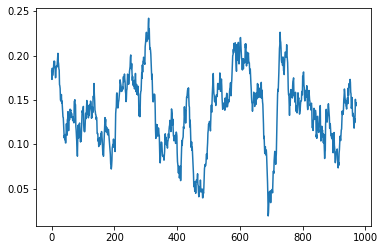

In [ ]:
#the above results are very noisy, so we need to take moving average
window_size = 30 #define window size (how many points it calcs avg on)

#calculate moving average
i = 0
moving_averages = []
while i < len(scores) - window_size + 1:
    this_window = scores[i : i + window_size]

    window_average = sum(this_window) / window_size
    moving_averages.append(window_average)
    i += 1

#plot moving average
plt.plot(moving_averages)

# Interpretation of the results

### Basic Stats

There are 3,803 sentences in the text with an average sentence length of 157 characters. There are an average of 33 words in each sentence. The entire corpus has roughly 125,484 words with 6,796 unique words. It is important to note that this text was translated from Ancient Greek. However, we take the text for what it is. These basic statistics do not tell us a huge amount about the text itself. However, it is good to get a 'feel' for what is happening on a macro level in the corpus. Furthermore, the overall sentiment score is .14. This is a pretty neutral score. We will dive deeper into this in a subsequent section. 

### Phrases 

1.   Adjective Phrases: RB + JJ

First, we look at the adjective phrases or, RB + JJ. The top three phrases in order are, "so much  25", "as much  14", and "so many  14". The fact that these are the top three could imply that there is a lot of sentiment in the text. Furthermore, we can pick out many examples that support the original hypothesis that there are very high highs in the text and very low lows. These are most likely the highs of adventure, and the lows of missing home and dying before getting home. There are some positive phrases like "much better  5", and "very great  4". However, there are also some sad phrases; "very angry  13",
"not right  8", "already dead  4", and "still further  4". Finally, the average phrase length is 8.8. 




2.   Adverb Phrases: RB + RB 

Next, we found the adverb phrases, these have the structure of adverb + adverb, or RB + RB. The average length of these phrases is 7.86. This is fairly short in comparison to other phrases in this analysis. Amazingly, the adverb phrases seem to be centered around missing home. For example, the second most common adverb phrase is "so long  23". This is most likely referring to the time away from home. Many other phrases in the list show this as well, they are; "back again  8", "far away  3", and "home again  5". This list may imply a negative yearning sentiment in the text, however, there is much more to the text than adverb phrases. 

3.  Adjectives + Nouns: JJ + NN

It is important to note that since the text was all set to lower case we miss many proper nouns. This analysis therefore does not include many of the proper nouns in the text. To fix this in the future I may decide to pre process the data in two different ways, one with lower casing and one without. This will allow us to find proper nouns, by using one data set when working with nouns, and the other data set for everything else. However, what is implemented in this analysis is a single data set where the text has been lowered. 

By combining adjectives and nouns it is possible to understand how nouns are described. This very much reinforces the hypothesis of juxtaposition and high points vs low points. We also start to see more references to things that we may associated with a piece written at that time. Our top two phrases are, "own house  33" and "own country  26". This again shows how the main theme is missing home. Very interestingly, we start to see phrases that reference the higher powers. These are, "immortal gods  12" and "other gods  11". The JJ+NN list also has some very sad phrases. These are, "wicked suitors  10", "bad end  8", and "much hardship  9". Combining JJ + NN is powerful because it tells us how nouns are described. It is very different to the RB+RB and the RB+JJ but still seems to be on the same themes of missing home. 


4. Verbs + Nouns 

Again, it is important to note that the text is all set to lower case and we therefore loose many proper nouns. These proper nouns are therefore not listed in the output when searching for any nouns. The combinations of verbs and nouns reinforce what has been shown so far with the phrases. The four of the top five phrases are about getting home; "get home  20", "said i  15", "go home  12", "getting home  11", and "come home  9". What is interesting to me and what can be learned from this is that the themes of a text can be shown in all the mentioned phrases. No matter which phrase we look at, JJ + NN, RB + RB, etc, we consistently see the main theme of the text which is going home. The average length of the verb phrases is 9.6 characters, longer than the previous few but still not lengthy at all. 

5. Adjective + conjunction + Adjective 

This is my favorite combination of tags. It only returns a few but they show the juxtaposition in the text. These are the top 3; "alive or dead  5", "old and young  4", and "good and evil  3". This directly highlights the two sides of the story, good and evil, old and young. It helps to show the themes of the text and what seems to reoccur. 

6. Adjective + Adjective 

One would think that this combination of phrases is very descriptive. The top few phrases are; "beautiful golden  7" , "many good  6", "poor unhappy  3" ,"needlework perish unrecorded-  3", "great web  3", "such good  3", and "own free  3". It is not as descriptive and illuminating as what I had expected. 

Of all the phrases considered, JJ+NN seemed to be the most interesting of all the phrases, especially when comparing it to the adverb and adjective phrases. My assumption regarding this is that by nature, adjectives and nouns play a special role. They highlight how people, places, and things are described. Depending on the type of work written, this measure would be the most interesting. 

### Top words 

For this section, we see the top words for each group of parts of speech. For example, we can see the most common nouns, including proper and plural nouns. However, since we are looking at individual words, it is much less descriptive and provides less meaning and context than the phrases. The groups that are considered are:



1.   Adjectives: JJ + JJR + JJS

There are some very interesting adjectives. Our main theme of being away from home is evident. The most common word is "own 271". This makes sense because our most common phrases were things like "own home" etc. This therefore is not adding more to our understanding. What I find fascinating about this text is the juxtaposition between two extremes. In the most common adjectives we find things like "old 148" and "young 78". We see words like "dead 74" and "alive 37". This sort of secondary theme of good vs evil, alive vs dead, old vs young, keeps popping up everywhere in this analysis. The text seems to be very comparative between such things. 


2.   Adverbs: RB + RBR + RBS

The adverbs in the text again, are not as interesting on their own. When they are combined with other tags we get very interesting results, but on their own there seems to be a lack of substance. For example, the top few words are 

not 761
then 555
so 524
now 275
here 218
as 166
back 161
still 161
again 158
very 150

Some of these are interesting. Like "back 161" most likely referencing "back home". As far as sentiment is concerned, it is very difficult to asses without the context that these words are taken from. 



3.   Verbs: VB + VBD + VBG + VBN + VBP + VBZ

The list of verbs generated seems to be littered with uninteresting things. The top few words are:

was 947
had 839
is 780
have 768
are 555

Obviously, non of these are interesting. However, this is an interesting contrast to the verb phrases. For example, when we looked at verbs and nouns it was very interesting. This shows how these parts of speech and tags really work together. Some of them are interesting on their own, but most of the time, they are much more descriptive when combined into a phrase. With the absence of a noun after the verbs, we are left with what seems to be a list of nothing with substance. 


4.   Nouns: NN + NNP + NNPS + NNS

Here we are confronted with an issue of the preprocessing. Pretty much most of the proper nouns are missed because the text is set to lower case. However, there are some very interesting results, especially when considering some domain knowledge. The top noun is 'ulysses 455'. This is one of the only  proper nouns found. We can deduce that since this is the top noun, of any form, that it is a very important character in the story. Furthermore, next top word is 'house 391'. This is clearly a reference to getting back to someone's own home, a theme that consistently appears in the text. Further down the list we see words like, "ship 225". They are traveling by ship for a large portion of the text. Along with this we also see the word "sea 171". Furthermore, we can see the word "gods 172". Looking at the top nouns was actually very illuminating. Unlike other top words found above, the nouns seem to be able to stand alone and still give some meaning. They also highlight some very fundamental things about the text. These include, house, sea, ship, gods, and home. 


### Sentiment Arc

This analysis is great for understanding how a text unfolds and moves in terms of sentiment. Basically, we take the sentiment of a batch of characters, then take a moving average of the results. The highest point has an average sentiment of nearly .25 and the lowest point of about 0. From looking at this, one can tell that it really is a roller coaster of sentiment. There are high highs and low lows. Furthermore, we can see that it is not consistently positive to negative or negative to positive. The moving average shows that it grows and falls over time cyclically. Further analysis can be done to explore just the lowest sentiment portion and just the highest sentiment portions. Furthermore, we can look at things like how many peaks and valleys do we have in terms of sentiment. We can also experiment with the window size for the moving average. 




# Suggestion on Sentiment Analysis

I have multiple ideas on how to create my own sentiment analysis algorithm. However, they would all rely on a lexicon of words that have pre defined weights of positive or negative values. We can match our phrases with these and aggregate them to get an overall sentiment. This aggregation can be a weighted average with the frequency. However, this brings up a problem, we do not know if the preceding word before the phrase has a word like 'not'. That could flip the entire sentiment of the set of words. Therefore, we would probably look at our phrases, but expand to the words before and after. That would allow us to capture more information. For example, say we have the word 'good', with a score of .5. (sentiment is from very negative in -1, to very positive 1). If the word 'not' is found before, we would just flip the sign of the score .5 to -.5. This would mean that we need a lexicon of values, and a lexicon of words that would flip the sign. Eventually, we can simply loop through the phrases, with an added window of words before and after, and begin calculating an aggregate score. We can also use machine learning. We could for example, download a dataset from yelp or Trip Advisor with the labels of the ratings. We can then train a classifier to label a review as positive or negative given the words in the review. We can then run that same model on our text sentence by sentence and simply take the average of the results. 